In [1]:
import VBMicrolensing
import math
import numpy as np
import matplotlib.pyplot as plt
from pathos.multiprocessing import ProcessingPool as Pool

from  hmcSampler import HMCSampler

VBM = VBMicrolensing.VBMicrolensing()



In [2]:
def U(q):
    if q.ndim == 1:
        prior =  np.sum((q - q_prior)**2/(2.0*q_prior_sigma**2))
        return np.sum(((y - model(q,x))/sigma)**2,axis=-1)/2.0 + prior
    else:
        prior =  np.sum((q.T - q_prior)**2/(2.0*q_prior_sigma**2),axis=1)
        return np.sum(((y - model(q,x))/sigma)**2,axis=-1)/2.0 + prior


def process_column(index, q, x):
    return q[0,index] * np.asarray(VBM.BinaryLightCurve(q[2:, index], x)[0]) + q[1,index]


def model(q,x):

    if q.ndim == 1:
        m = q[0] * np.asarray(VBM.BinaryLightCurve(q[2:],x)[0]) + q[1]

    else:

# Parallelize the loop
        with Pool(processes=6) as pool:  # Set the number of processes
            results = pool.map(lambda i: process_column(i, q, x), range(q.shape[1])) 

        m = np.vstack(results)


    return m
 


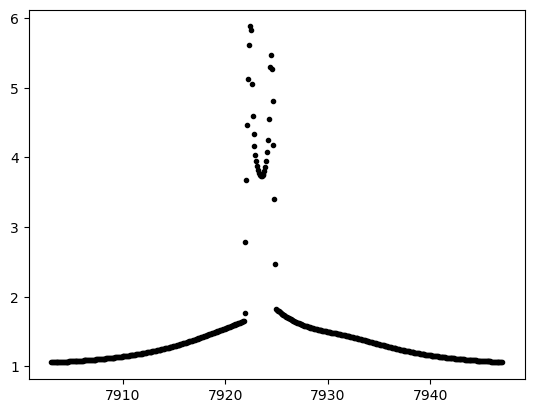

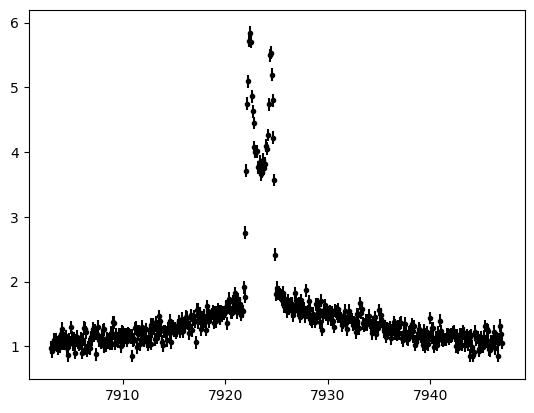

In [3]:
s = 0.9       # Separation between the lenses
q = 0.6       # Mass ratio
u0 = -0.55       # Impact parameter with respect to center of mass
alpha = -3.0       # Angle of the source trajectory
rho = 0.025      # Source radius
tE = 12     # Einstein time in days
t0 = 7925     # Time of closest approach to center of mass

# Array of parameters. Note that s, q, rho and tE are in log-scale
pr = [1.0, 0.0, math.log(s), math.log(q), u0, alpha, math.log(rho), math.log(tE), t0]

t = np.linspace(t0-tE-10, t0+tE+10, 500) # Array of times

magnifications = model(np.asarray(pr),t)      # Calculation of binary-lens light curve

plt.plot(t,magnifications, 'k.')
plt.show()

sythetic_data = magnifications + 0.1*np.random.normal(0, 1.0, len(magnifications))
errors = np.ones(len(magnifications))*0.1

plt.errorbar(t,sythetic_data, yerr=errors, fmt='k.')
plt.show()

In [4]:
global x, y, sigma, q_prior, q_prior_sigma

x = t
y = sythetic_data
sigma = t*0.0 + 0.1

q_prior= np.asarray(pr)

q_prior_sigma = np.array([10.0,10.0,1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0])

In [18]:
smp = HMCSampler()

smp.U = U

smp.qi = np.asarray([1.0,0.0,math.log(s)*1.01, math.log(q)*1.01, u0*1.01, alpha*1.01, math.log(rho)*1.01, math.log(tE)*1.01, t0])
smp.dim_labels=['A0','A1','s','q','u0','alpha','rho','tE','t0'] 

smp.n_samples = 1000
smp.n_burnin = 1000
smp.lf_length = 0.05
smp.steps =10000
smp.n_walkers = 100

smp.file_name = 'microlensing'
smp.save_every = 100

smp.dU_step_size = 1e-12

In [19]:
smp.n_walkers = 2

smp.initialise_parameters()
qis,_,_ = smp.initialise_walkers()

qis = qis[:,0,:]
qfs,ofs,af = smp.generate_sample(qis)

print(af)
print(qfs-qis)


[False False]
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


1
[[ 1.00531342e+00]
 [ 1.28348932e-02]
 [-9.69030356e-02]
 [-5.11234831e-01]
 [-5.42121776e-01]
 [-3.04380166e+00]
 [-3.72005958e+00]
 [ 2.50321305e+00]
 [ 7.92498393e+03]]


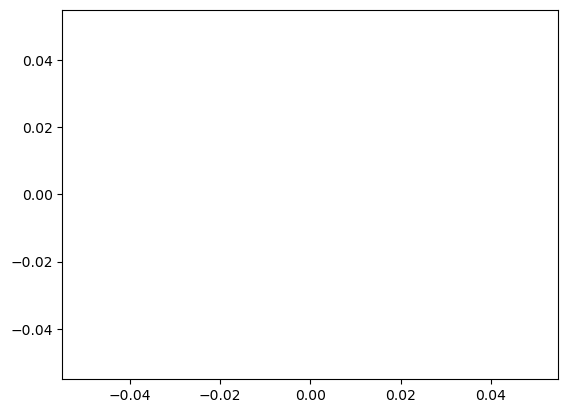

2
[[ 1.00498945e+00]
 [ 1.29692301e-02]
 [-9.76663001e-02]
 [-5.12011522e-01]
 [-5.44382479e-01]
 [-3.04041829e+00]
 [-3.72004874e+00]
 [ 2.50342609e+00]
 [ 7.92498309e+03]]


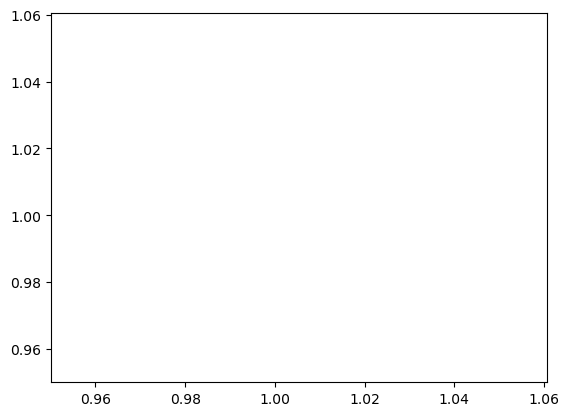

3
[[ 1.00425561e+00]
 [ 1.29986624e-02]
 [-9.81778052e-02]
 [-5.14275052e-01]
 [-5.51619680e-01]
 [-3.02939713e+00]
 [-3.71985179e+00]
 [ 2.50523671e+00]
 [ 7.92498132e+03]]


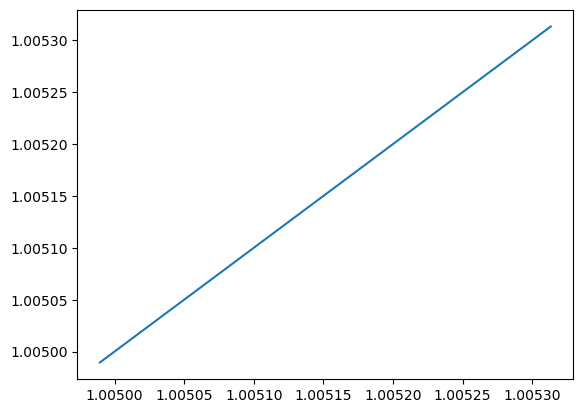

4
[[ 1.00325895e+00]
 [ 1.29315604e-02]
 [-1.02404639e-01]
 [-5.17338440e-01]
 [-5.60839296e-01]
 [-3.01426362e+00]
 [-3.71958167e+00]
 [ 2.50740501e+00]
 [ 7.92497902e+03]]


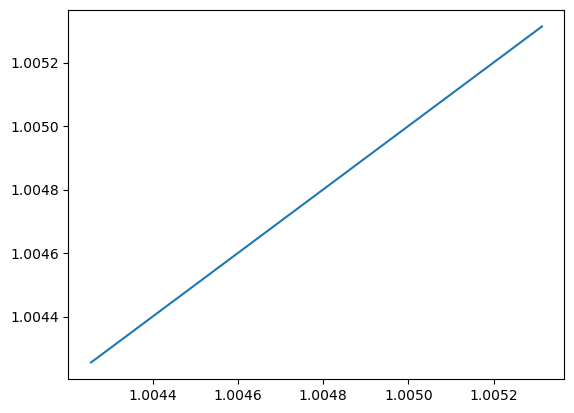

5
[[ 1.00210841e+00]
 [ 1.27824618e-02]
 [-1.10267518e-01]
 [-5.20201299e-01]
 [-5.68809749e-01]
 [-2.99999383e+00]
 [-3.71929587e+00]
 [ 2.50889125e+00]
 [ 7.92497679e+03]]


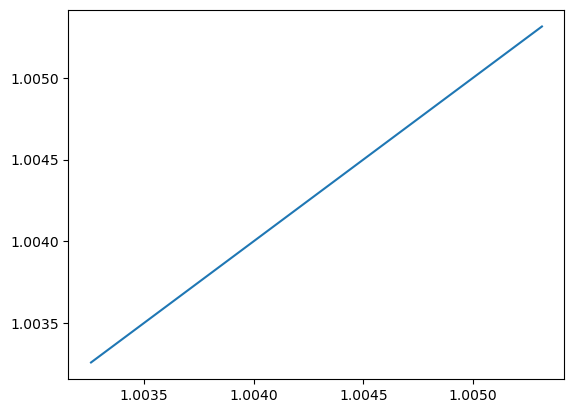

6
[[ 1.00079196e+00]
 [ 1.25730523e-02]
 [-1.18343774e-01]
 [-5.21523566e-01]
 [-5.72018421e-01]
 [-2.99323742e+00]
 [-3.71889950e+00]
 [ 2.50859077e+00]
 [ 7.92497540e+03]]


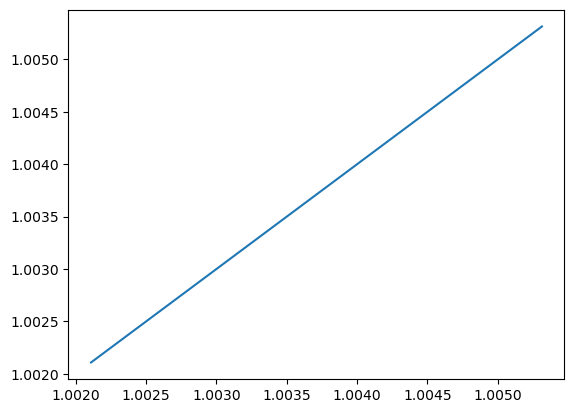

7
[[ 9.99292335e-01]
 [ 1.23255861e-02]
 [-1.26342538e-01]
 [-5.21251972e-01]
 [-5.70424195e-01]
 [-2.99418850e+00]
 [-3.71836674e+00]
 [ 2.50642989e+00]
 [ 7.92497489e+03]]


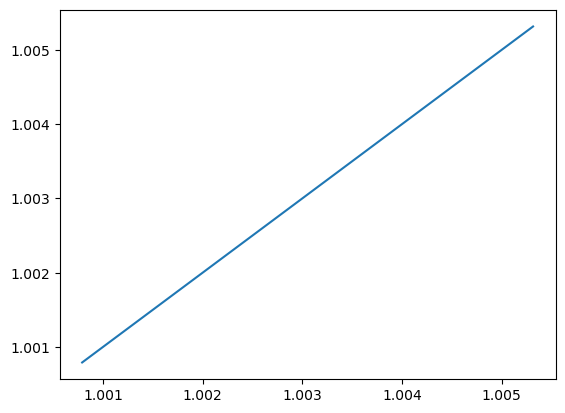

8
[[ 9.97663586e-01]
 [ 1.20637101e-02]
 [-1.33635648e-01]
 [-5.19615738e-01]
 [-5.64848627e-01]
 [-3.00177606e+00]
 [-3.71771628e+00]
 [ 2.50272237e+00]
 [ 7.92497514e+03]]


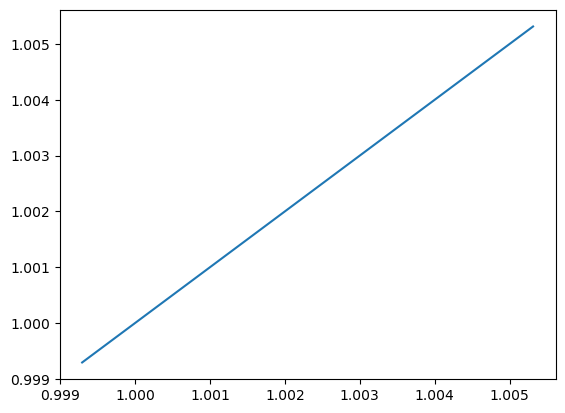

9
[[ 9.95968288e-01]
 [ 1.18078311e-02]
 [-1.36939472e-01]
 [-5.17500378e-01]
 [-5.58547239e-01]
 [-3.01189175e+00]
 [-3.71700512e+00]
 [ 2.49883931e+00]
 [ 7.92497573e+03]]


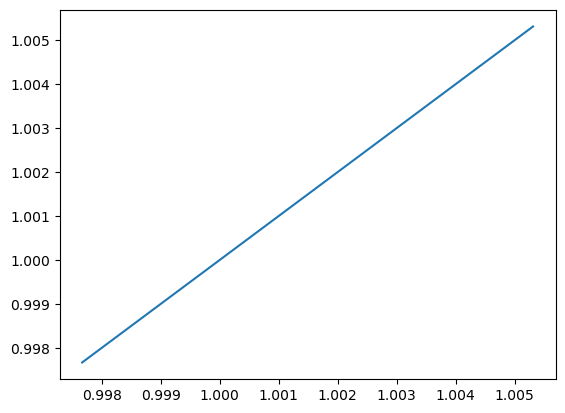

In [ ]:
smp.run_hmc()

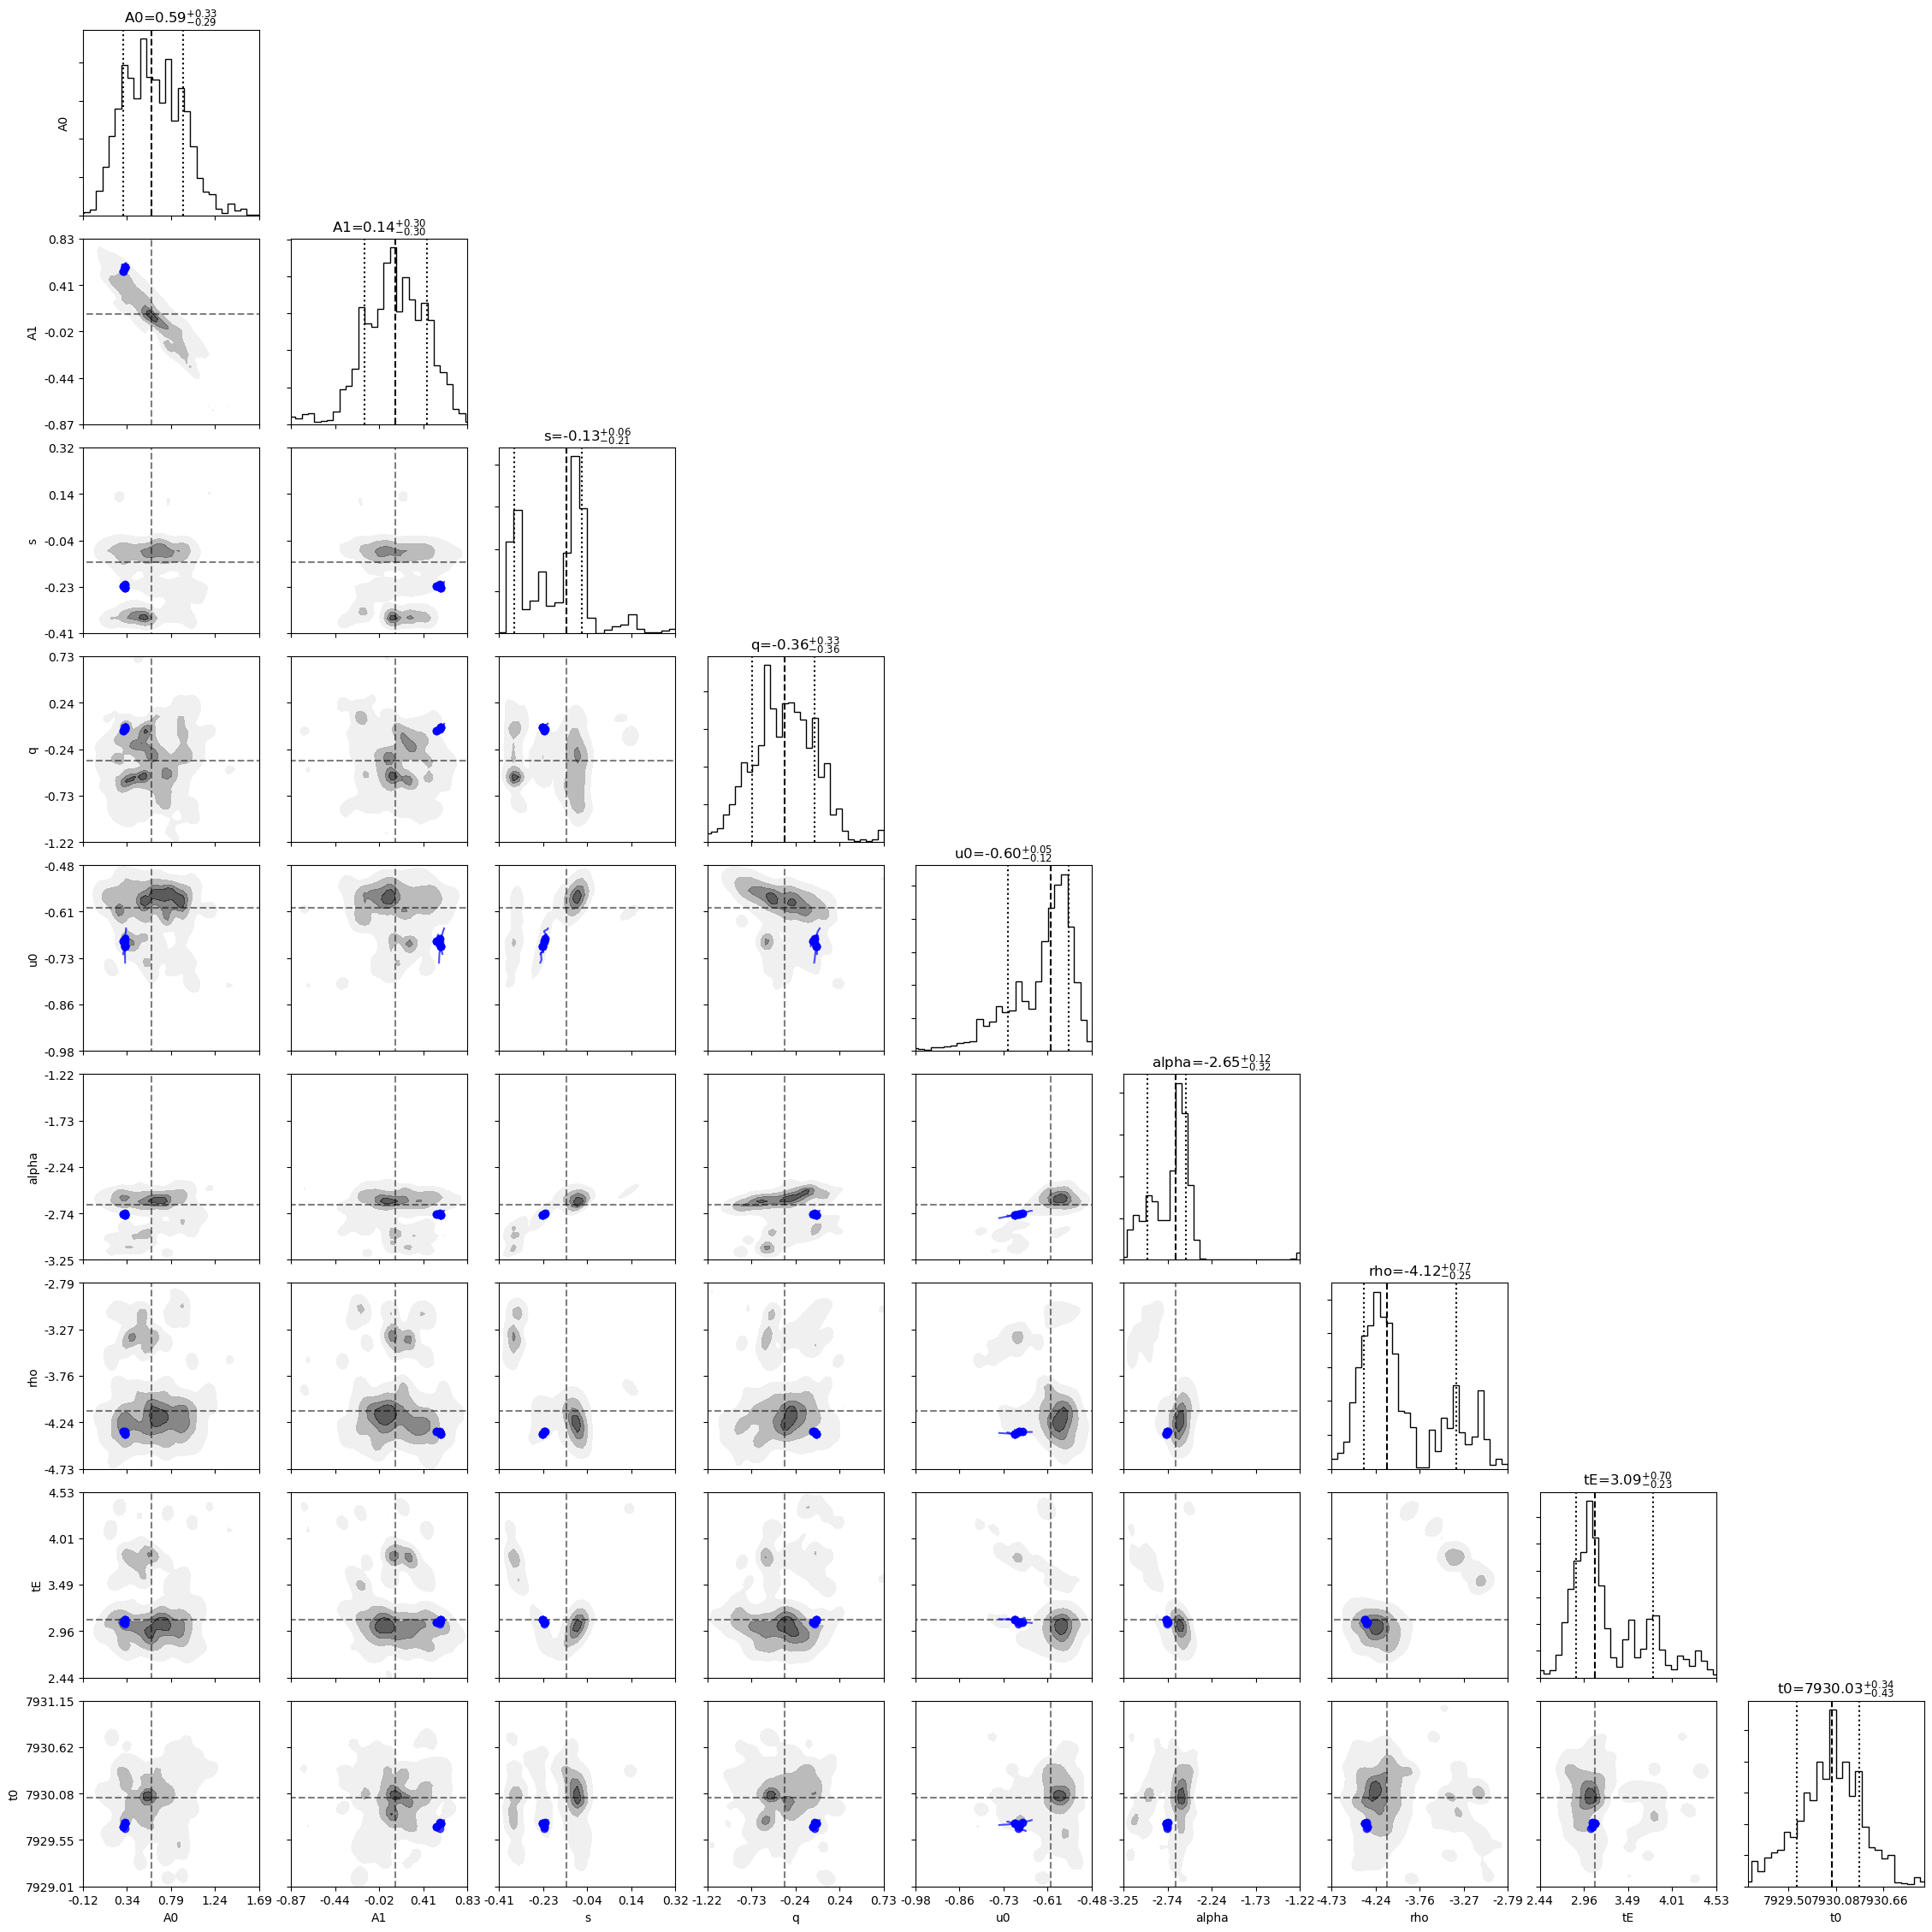

In [ ]:
sample_plot = smp.plot_orbits(10,['A0','A1','s','q','u0','alpha','rho','tE','t0'])

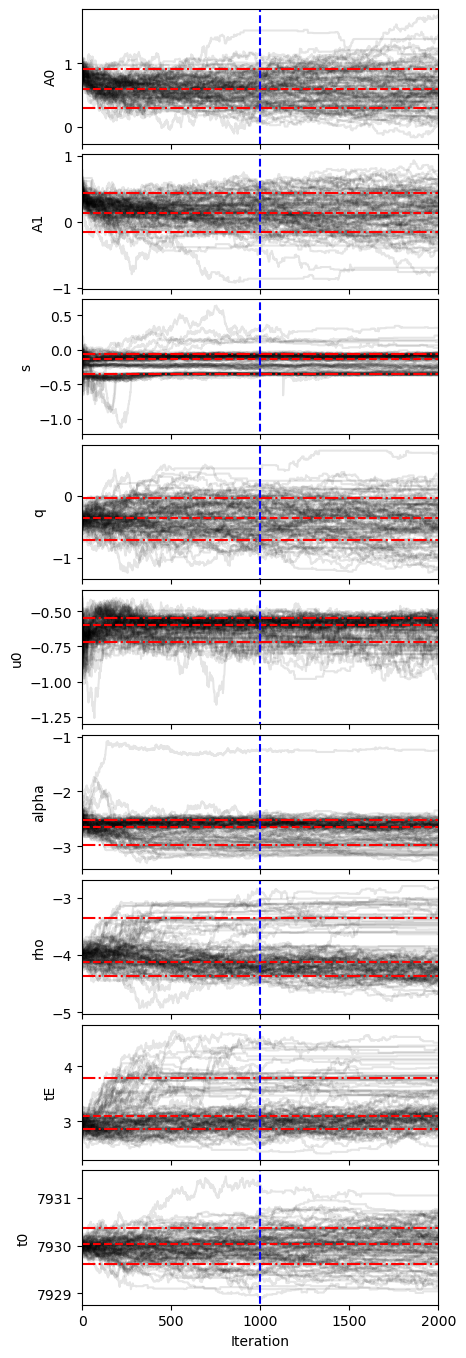

In [ ]:
chain_plot = smp.plot_chains()

[1000.0, 500.0, -0.10536051565782628, -0.5108256237659907, -0.55, -3.0, -3.6888794541139363, 2.4849066497880004, 7925]
[ 9.00000000e+02  4.00000000e+02 -1.06414121e-01 -5.15933880e-01
 -5.55500000e-01 -3.03000000e+00 -3.72576825e+00  2.50975572e+00
  7.92500000e+03]


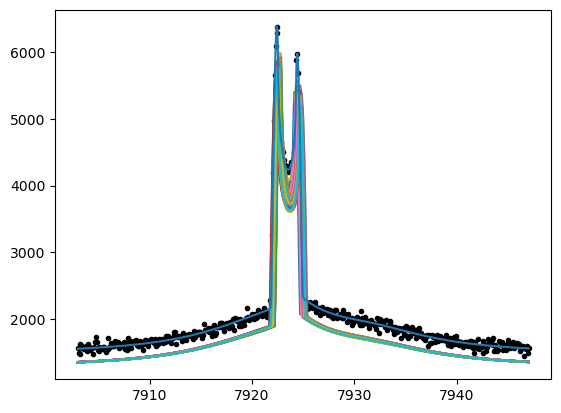

In [ ]:
# median_sol = np.median(smp.samples,axis=0)
# last_sol = smp.samples[0,:]
# print(last_sol)
smp.n_walkers = 100
smp.initialise_parameters()
qis,_,_ = smp.initialise_walkers()

qis = qis[:,0,:]

print(pr)
print(smp.qi)
plt.plot(x,y,'k.')
plt.plot(x,model(qis,x).T)
plt.plot(x,model(np.asarray(np.asarray(pr)),x))
plt.show()

(9, 100)


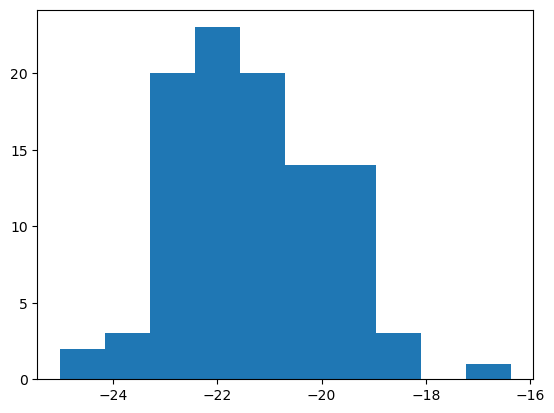

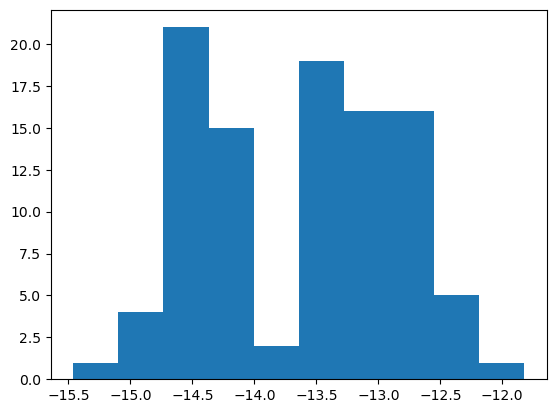

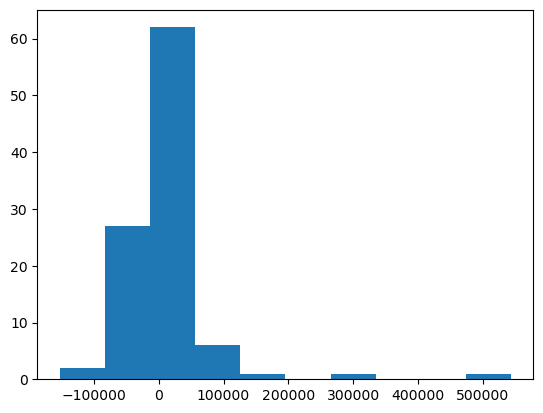

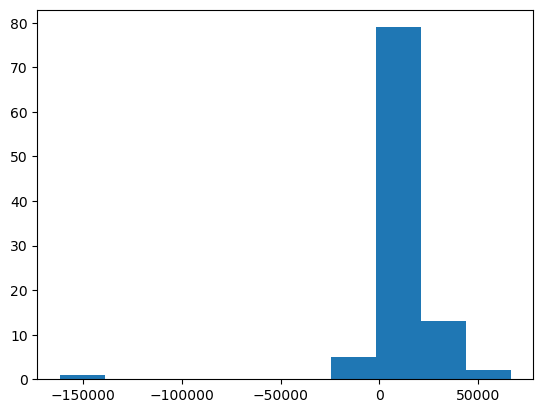

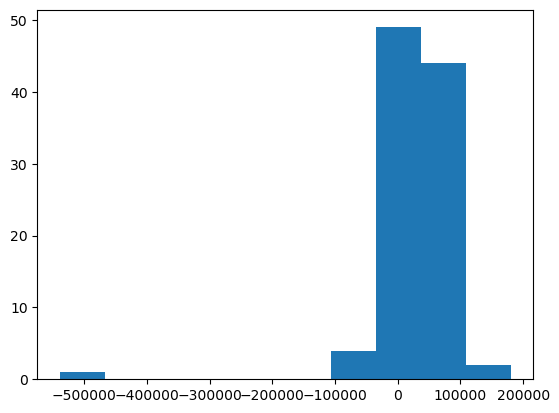

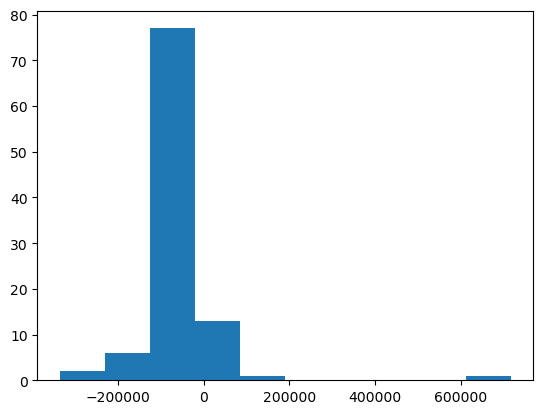

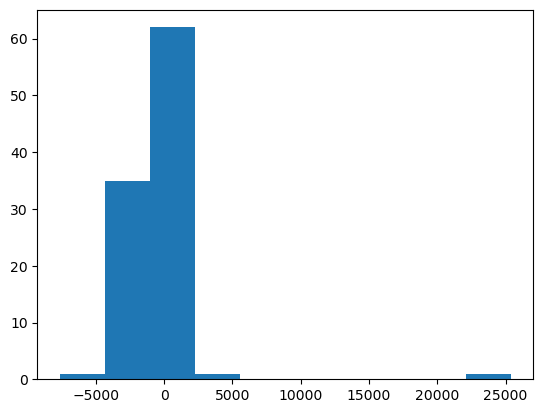

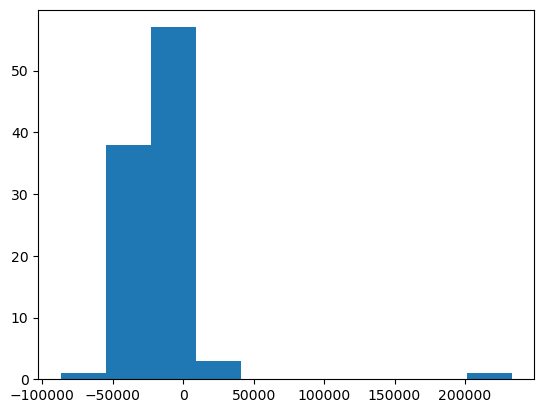

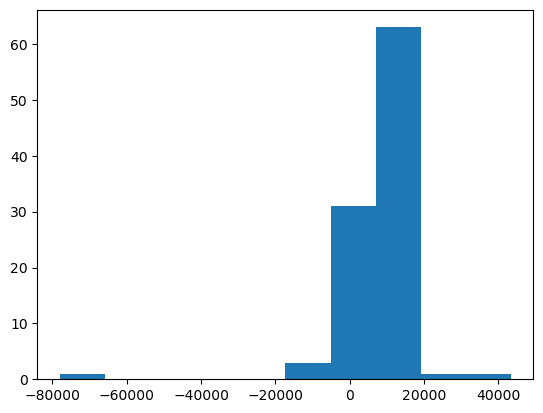

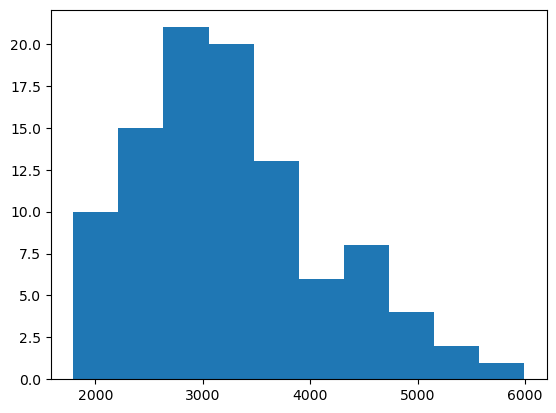

In [ ]:

dUs = smp.dU(qis)
Us = smp.U(qis)

print(dUs.shape)

for i in range(9):
    plt.hist(dUs[i,:])
    plt.show()

plt.hist(Us)
plt.show()

In [ ]:
print(smp.qi)
print(smp.U(smp.qi))
print(smp.U(np.asarray(pr)))
print(smp.dU(smp.qi))
print(smp.dU(np.asarray(pr)))

[ 9.00000000e+02  4.00000000e+02 -1.06414121e-01 -5.15933880e-01
 -5.55500000e-01 -3.03000000e+00 -3.72576825e+00  2.50975572e+00
  7.92500000e+03]
2765.4937243048985
62.50563499415648
[-2.22826202e+01 -1.40971679e+01  1.74031811e+03  1.64850462e+04
  4.06857907e+04 -8.28254088e+04 -5.31599653e+02 -2.24058567e+04
  9.74614522e+03]
[-1.13686838e-01 -1.98951966e-01  2.37425013e+03  5.57776048e+01
 -1.02296838e+02 -4.02202716e+02 -9.37916411e+00  1.97275085e+02
  7.49196261e+01]
